# **FIRST KAGGLE SUBMISSION - Code Explanantion Line-By-Line**

This lab assignment gives an introduction to the coursework assignment and walks you through the first submission to the online model checker.

# **Task 0: Setting up your Kaggle account**

1. Go to https://www.kaggle.com and create an account. Wait for the email confirmation and then log in.
2. Go to https://www.kaggle.com/t/d9310f0a07e0982afae3e4e669559331 sign up to the competition. You should be allowed to participate now.
3. You can use http://www.kaggle.com/c/budl25 to access the competition again at any time.

# **Task 1: Download the dataset**

You can access the competition data and submit your solutions via the [Kaggle website](https://www.kaggle.com/c/budl25) or using the [Kaggle API](https://github.com/Kaggle/kaggle-api). In the latter case all the interactions with Kaggle can be performed without leaving the notebook environment, so this is what we're going to use.

In order to access the Kaggle API you will need to create and download the Kaggle API Token (you only need to do it once):
- Go to the **Account** section of the Kaggle website (can be found of you click on your profile avatar in the top right corner of the screen)
- Choose **Settings** and then **Create New API Token** button
- This will trigger download of the file named `kaggle.json` - open the file, copy the `username` and `key` from the file and paste them the next cell where it says `YOUR_USERNAME_GOES_HERE` and `YOUR_KEY_GOES_HERE` respectively.

You can find more detailed instructions at https://github.com/Kaggle/kaggle-api

In [ ]:
# put Kaggle API credentials where they belong
!mkdir -p /root/.config/kaggle
!echo '{"username":"hmpandey","key":"ffe21e7014b5401f22801998b3b3df63"}' > /root/.config/kaggle/kaggle.json
!chmod 600 /root/.config/kaggle/kaggle.json

In the cell below you will download the competition data and unzip it:

In [ ]:
import kaggle
!kaggle competitions download -c budl25 --force
!unzip -o *.zip

 95% 436M/460M [00:00<00:00, 371MB/s]
100% 460M/460M [00:01<00:00, 443MB/s]
Archive:  budl25.zip
  inflating: all_labels.csv          
  inflating: processed/processed/img_0000.png  
  inflating: processed/processed/img_0001.png  
  inflating: processed/processed/img_0002.png  
  inflating: processed/processed/img_0003.png  
  inflating: processed/processed/img_0004.png  
  inflating: processed/processed/img_0005.png  
  inflating: processed/processed/img_0006.png  
  inflating: processed/processed/img_0007.png  
  inflating: processed/processed/img_0008.png  
  inflating: processed/processed/img_0009.png  
  inflating: processed/processed/img_0010.png  
  inflating: processed/processed/img_0011.png  
  inflating: processed/processed/img_0012.png  
  inflating: processed/processed/img_0013.png  
  inflating: processed/processed/img_0014.png  
  inflating: processed/processed/img_0015.png  
  inflating: processed/processed/img_0016.png  
  inflating: processed/processed/img_0017.png  
 

In [ ]:
!ls /content/

all_labels.csv	budl25.zip  processed  sample_data


Let's load the .csv file and see what it looks like:

In [ ]:
input_dir = '/content/processed/processed'

# **Explanation of Below Code:**


```
import pandas as pd
```
This line imports the pandas library and gives it the short name pd so it’s easier to use. Pandas is a Python library that helps you work with structured data (like tables or spreadsheets). It’s commonly used for data analysis and data cleaning.



```
df = pd.read_csv('all_labels.csv')
```
This line reads a CSV file named all_labels.csv and loads its content into a pandas DataFrame called df.

The read_csv() function automatically understands that the file contains rows and columns separated by commas.

After running this line, df holds your data in a structured, table-like format, where each column represents a feature (e.g., filename, label, or class).


```
df.head(10)
```

This line displays the first 10 rows of the DataFrame. It’s a quick way to check that the data has loaded correctly and to see what kind of information your dataset contains.

For example, you might see the image filenames in one column and their corresponding labels in another.

In [ ]:
import pandas as pd
df = pd.read_csv('all_labels.csv')
df.head(10)

,filename,ID,SEX
0,img_0000,366,1.0
1,img_0001,368,1.0
2,img_0002,368,1.0
3,img_0003,371,NaN
4,img_0004,371,NaN
5,img_0005,372,NaN
6,img_0006,372,NaN
7,img_0007,374,0.0
8,img_0008,374,0.0
9,img_0009,377,NaN


# **Explanation of Below Code:**

```
from PIL import Image
```
This line imports the Image module from the PIL (Python Imaging Library) package.

- PIL (or its modern version, Pillow) is a Python library used for opening, editing, and processing images.

- By importing Image, you gain access to functions that can read image files and perform operations like resizing or cropping.


```
im = Image.open(f'{input_dir}/{df["filename"][0]}.png')
```
This line opens an image file and stores it in the variable im.

- input_dir is the folder where your images are stored.

- df["filename"][0] takes the first filename from the column named “filename” in your DataFrame df.

- The f'{...}' part is called an f-string, which helps combine text and variables easily.

- Altogether, this line opens the first image file (for example, something like "images/sample_01.png") from your dataset.


```
print(im.size)
```

This prints the dimensions of the image — that is, the width and height in pixels. For example, it might print (256, 256) meaning the image is 256 pixels wide and 256 pixels tall.



```
im
```
When you type just im in a Notebook or similar environment, it displays the image.

This helps you visually confirm that the correct image has been opened and looks as expected.




(806, 1238)


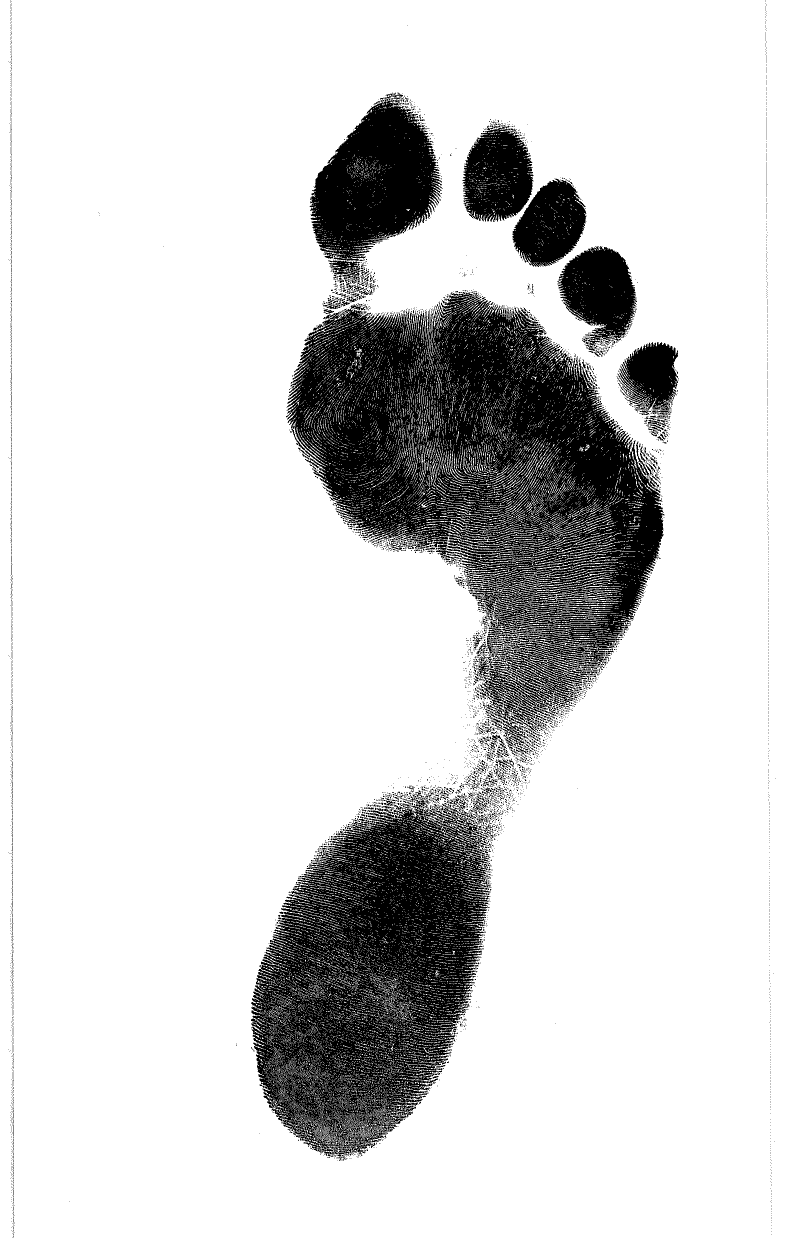

In [ ]:
from PIL import Image
im = Image.open(f'{input_dir}/{df["filename"][0]}.png')
print(im.size)
im

# **Explanation of Below Code:**

```
im = Image.open(f'{input_dir}/{df["filename"][20]}.png')
```
-This line opens an image file and stores it in a variable called im.

- input_dir is the folder where all your images are saved.

- df["filename"][20] picks the 21st filename (since Python starts counting from 0) from the "filename" column of your DataFrame df.

- The f'{...}' part is an f-string that helps build the file path easily — for example: "**dataset_folder/image_21.png**"

- So, this line finds and opens the 21st image from your dataset so you can inspect it.


```
print(im.size)
```
- This line prints the size of the image — that is, its width and height in pixels. For example, if it prints (256, 256), it means the image is 256 pixels wide and 256 pixels tall. This is useful to check if all your images are of the same size before using them for training.


```
im
```
When you write just im (especially in Jupyter Notebook or Google Colab), it displays the image on the screen. This helps you visually verify that the correct image was loaded and that it looks fine (not corrupted or misplaced).




(806, 1238)


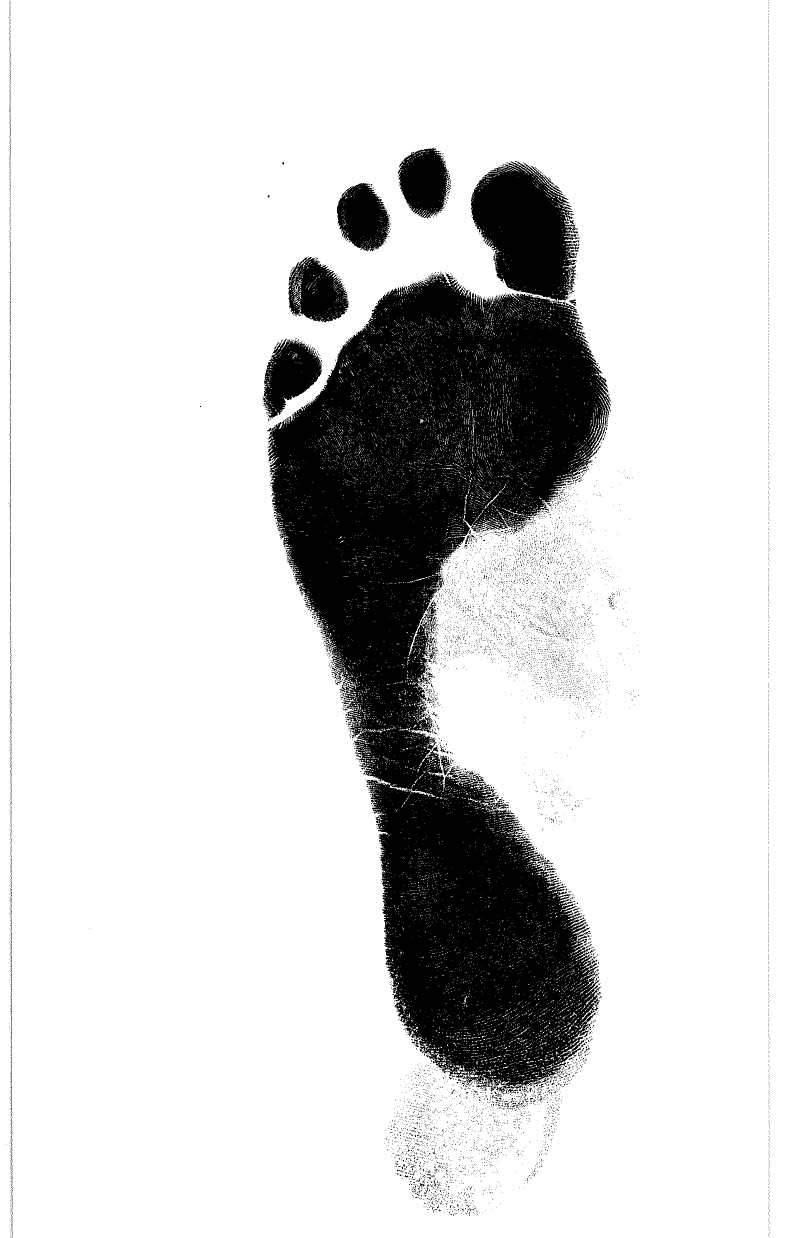

In [ ]:
im = Image.open(f'{input_dir}/{df["filename"][20]}.png')
print(im.size)
im

Looks like they might all be of the same size, but it's something that would need to be verified.

# **Task 2: Prepare data for training**

# **Explanation of Below Code:**

```
import os
```
Imports the os module, which lets Python interact with your computer’s file system — for example, to create folders or check if files exist.

```
from tqdm.notebook import tqdm
```
Imports tqdm, a handy tool that shows a progress bar when looping through many items. It helps you see how much of the process (like resizing images) has been completed.

```
from PIL import Image
```
Imports the Image class from the PIL (Pillow) library, which is used for opening, resizing, and saving images in Python.
```
resized_folder = '/content/resized'
```
Defines a folder path named resized_folder where all the resized images will be saved. In this example, the folder is located at /content/resized.
```
if not os.path.exists(resized_folder):
```
Checks whether the folder /content/resized already exists on your computer. This helps avoid errors when trying to save files to a folder that doesn’t exist.
```
os.makedirs(resized_folder)
```
If the folder doesn’t exist, this line creates it so that resized images can be saved there safely.
```
new_size = (80, 120)
```
Defines the new size (width = 80 pixels, height = 120 pixels) for all images. The comment mentions this is a very small size — good for quick testing, but not ideal for real model training.
```
for index, row in tqdm(df.iterrows(), total=df.shape[0]):
```
- Loops through each row in the DataFrame df.
- df.iterrows() returns one row at a time (each containing a filename).
- tqdm(...) adds a progress bar so you can see how many images have been processed.
- total=df.shape[0] tells tqdm the total number of rows (images) in your dataset.
```
img_path = f'{input_dir}/{row["filename"]}.png'
```
Builds the full path to the image file by combining the folder (input_dir) and the filename from the DataFrame. For example: "images/image_1.png".
```
try:
```
Starts a try block to catch errors if something goes wrong (like a missing or corrupted image).
```
img = Image.open(img_path)
```
Opens the image from the path you just created and stores it in the variable img.
```
resized_img = img.resize(new_size)
```
Resizes the opened image to the new size defined earlier (80, 120).
```
resized_img.save(f'{resized_folder}/{row["filename"]}.png')
```
Saves the resized image to the resized folder using the same filename.
```
except Exception as e:
```
If an error happens while opening, resizing, or saving the image, Python jumps here instead of stopping the whole program.
```
print(f"Error processing {img_path}: {e}")
```
Prints an error message showing which image caused the problem and what the error was.

The images are fairly large, so let's first resize them.

In [ ]:
import os
from tqdm.notebook import tqdm
from PIL import Image

resized_folder = '/content/resized'

# Create a directory to save resized images
if not os.path.exists(resized_folder):
    os.makedirs(resized_folder)

# Define the new size - this is very small and probably unusable but we'll use it for speed
new_size = (80, 120)

# Iterate through each image in the dataframe and resize
for index, row in tqdm(df.iterrows(), total=df.shape[0]):
    img_path = f'{input_dir}/{row["filename"]}.png'
    try:
        img = Image.open(img_path)
        resized_img = img.resize(new_size)
        resized_img.save(f'{resized_folder}/{row["filename"]}.png')
    except Exception as e:
        print(f"Error processing {img_path}: {e}")

  0%|          | 0/2628 [00:00<?, ?it/s]

# **Explanation of Below Code:**
```
train_df = df[df['SEX'].notna()]
```
This line creates a new DataFrame called train_df. It takes all the rows from the main dataset df where the ‘SEX’ column is not empty (not NaN). In other words, train_df contains only the entries that have a valid value for gender (e.g., “Male” or “Female”). This is often used when you have complete data and want to use it for training a model.
```
test_df = df[df['SEX'].isna()]
```
This line creates another DataFrame called test_df. It selects all the rows where the ‘SEX’ column is empty or missing (NaN). These entries do not have gender information, so they can be used as the test dataset — the model can later try to predict their missing values.
```
print("Train dataset size:", len(train_df))
```
This line prints the total number of rows (or samples) in the training dataset. The function len(train_df) counts how many records were included after filtering.
```
print("Test dataset size:", len(test_df))
```
Similarly, this prints the number of records in the test dataset that have missing ‘SEX’ values.
```
test_df
```
This line displays the contents of the test dataset (in Jupyter Notebook or Google Colab). You can see which rows have missing ‘SEX’ values and will be used later for prediction or testing.


#In Simple Terms:
This code splits your dataset into two parts as follows:

- Training data (train_df) → rows where ‘SEX’ is known.
- Testing data (test_df) → rows where ‘SEX’ is missing.

It then prints how many samples are in each group and shows the test data, helping you clearly see how your dataset has been divided for model training and evaluation.

You may have noticed that some of the entries in the data frame do not have SEX assigned to them. These are the test set examples. Let's split them into two data frames.

In [ ]:
train_df = df[df['SEX'].notna()]
test_df = df[df['SEX'].isna()]

print("Train dataset size:", len(train_df))
print("Test dataset size:", len(test_df))

test_df

Train dataset size: 1573
Test dataset size: 1055


,filename,ID,SEX
3,img_0003,371,NaN
4,img_0004,371,NaN
5,img_0005,372,NaN
6,img_0006,372,NaN
9,img_0009,377,NaN
...,...,...,...
2610,img_2610,492,NaN
2613,img_2613,281,NaN
2614,img_2614,281,NaN
2617,img_2617,308,NaN


# **Explanation of Below Code:**

This code defines a custom dataset class called **FootprintDataset** for use with PyTorch, a popular deep learning library.

It helps us load, preprocess, and organize image data (footprint images) along with their labels (e.g. 0/1) — so that they can be easily fed into a neural network during training.

1. Importing the required libraries
```
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms.v2 import Normalize, Compose, ToImage, ToDtype
from PIL import Image
import os
```
- torch → The main PyTorch library for building and training neural networks.
- Dataset and DataLoader → Tools from PyTorch used to handle datasets and load them efficiently during training.
- Normalize, Compose, ToImage, ToDtype → Transform functions from torchvision that help preprocess images (e.g., convert them to tensors, resize, normalize, etc.).
- PIL.Image → Used for opening and working with images.
- os → Used to manage file paths (like finding images inside folders).

2. Creating a custom dataset class
```
class FootprintDataset(Dataset):
```
Defines a new dataset class called FootprintDataset, which extends PyTorch’s built-in Dataset class. This allows you to tell PyTorch how to load your data (images and labels) in a way that suits your project.

3. Constructor method
```
def __init__(self, df, img_dir, transform=None):
    self.df = df
    self.img_dir = img_dir
    self.transform = transform
```
This method runs automatically when you create a new dataset object.

- df → The DataFrame (like train_df or test_df) that contains image names and labels.
- img_dir → The folder where the images are stored.
- transform → Optional preprocessing (like resizing or converting to tensor).
- The self. keyword saves these inputs inside the class so they can be used later.

4. Getting dataset length
```
def __len__(self):
    return len(self.df)
```
This function tells PyTorch how many total samples are in the dataset.
- len(self.df) simply counts the number of rows in the DataFrame (i.e., how many images you have).
- This is useful for looping or batching data during training.

5. Getting one data sample
```
def __getitem__(self, idx):
    img_name = os.path.join(self.img_dir, self.df.iloc[idx, 0] + '.png')
    image = Image.open(img_name).convert('L') # our images are greyscale
    sex = self.df.iloc[idx, 2]
```
- This function tells PyTorch how to load a single image and its label when given an index (idx).

- img_name → Builds the full path to the image by combining the folder name and image filename.

- Image.open() → Opens the image from that path.

- .convert('L') → Converts the image to grayscale (single-channel) because the dataset uses black-and-white footprint images.
- sex → Reads the label (e.g., gender) for the same image from the DataFrame.

6. Applying transformations
```
if self.transform: image = self.transform(image)
```
- If you provided a transformation (like converting to a tensor or normalization), this line applies it to the image.

- If no transformation is given, it just skips this step.

7. Handling missing labels
```
if pd.isna(sex): sex = -1
```
- Checks if the label (sex) is missing (NaN).

- If yes, it replaces it with -1 — a placeholder to mark unknown or test samples.

- This is important for separating test data that doesn’t have a known label.

8. Returning the data
```
return image, torch.tensor(sex, dtype=torch.float32)
```
Returns two things:

- The image, possibly transformed (e.g., converted to a tensor).

- The label (sex) converted into a PyTorch tensor of type float32, so it’s ready for training in a neural network.

9. Creating the training and testing datasets
```
train_ds = FootprintDataset(train_df, resized_folder)
test_ds  = FootprintDataset(test_df,  resized_folder)
```
Creates two dataset objects:

- train_ds → for training (with known labels).

- test_ds → for testing (with missing or predicted labels).

- Both use images stored in the resized_folder.

10. Checking the first training sample
```
train_ds[0] # notice we're getting a PIL Image object, not tensor
```

Loads the first image and its label from the training dataset. Since no transform was applied, the image is still a PIL Image, not yet converted to a tensor. This is just to test that your dataset works correctly.


Here we create a fairly standard and minimalistic custom Pytorch dataset.

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms.v2 import Normalize, Compose, ToImage, ToDtype
from PIL import Image
import os

class FootprintDataset(Dataset):
    def __init__(self, df, img_dir, transform=None):
        self.df = df
        self.img_dir = img_dir
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        img_name = os.path.join(self.img_dir, self.df.iloc[idx, 0] + '.png')
        image = Image.open(img_name).convert('L') # our images are greyscale
        sex = self.df.iloc[idx, 2]

        if self.transform: image = self.transform(image)

        # Handle NaN values in the target variable (test set)
        if pd.isna(sex): sex = -1

        return image, torch.tensor(sex, dtype=torch.float32)

train_ds = FootprintDataset(train_df, resized_folder)
test_ds  = FootprintDataset(test_df,  resized_folder)

train_ds[0] # notice we're getting a PIL Image object, not tensor

(<PIL.Image.Image image mode=L size=80x120>, tensor(1.))

# **Explanation of Below Code:**
```
transforms = Compose([...])
```
Compose is a utility from torchvision.transforms.v2 that lets you chain multiple image transformations together. Each transformation is applied in the order it’s written. Here, the transformations will prepare the image before feeding it into the neural network.
```
ToImage(),
```
Converts the input (which could be a NumPy array, tensor, or PIL image) into a TorchVision image format (torchvision.tv_tensors.Image). This ensures consistency in how images are handled by PyTorch before training.
```
ToDtype(torch.float32, scale=True),
```
Converts the image data type to 32-bit floating point (float32), which is the standard type used by neural networks.

scale=True scales pixel values from their original range (0–255 for images) to a normalized range of 0–1, making training more stable.
```
Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
```
Normalization helps the model learn faster by centering the data around zero.


In [ ]:
# You'll need to calculate the mean and std deviation of your dataset for proper normalization!
transforms = Compose([
    ToImage(),                           # Convert a tensor, ndarray, or PIL Image to torchvision.tv_tensors.Image
    ToDtype(torch.float32, scale=True),  # Converts the input to a specific dtype, optionally scaling the values to 0..1 range
    Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])     # Normalization, currently using placeholder values!
])

# transforms is where you could add data augmentations too (like random flip or rotation) but for training data only!

# **Explanation of Below Code:**
```
import random
```
This module helps us pick random items from a list. We’ll use it to randomly select which data goes into training and validation sets.
```
train_size = len(train_df)
valid_size = int(0.2 * train_size)
```
- train_size counts how many samples we have in our training data (train_df).
- valid_size calculates 20% of the training data to use as validation data.
```
all_indices = list(range(train_size))
valid_ixs = random.sample(all_indices, valid_size)
train_ixs = list(set(all_indices) - set(valid_ixs))
```

- all_indices is a list of numbers from 0 to train_size-1. Each number represents a row in the dataset.
- valid_ixs randomly selects indices for the validation set.
- train_ixs takes the remaining indices for the training set.

So now we have two separate groups: training and validation.

```
train_ds = FootprintDataset(train_df.iloc[train_ixs], resized_folder, transform=transforms)
valid_ds = FootprintDataset(train_df.iloc[valid_ixs], resized_folder, transform=transforms)
test_ds  = FootprintDataset(test_df,  resized_folder, transform=transforms)
```
- FootprintDataset is a custom dataset class.

- We pass it the selected rows from the dataframe, the folder with images, and some transformations (like resizing or converting to tensors).

- train_ds, valid_ds, and test_ds are ready-to-use datasets for model training, validation, and testing.

```
train_ds[0]  # notice we're now getting a tensor
```
train_ds[0] gives the first image and its label from the training set. Because of the transform, the image is now a tensor, which is what PyTorch models can work with.

# In Simple Term:
This code randomly splits your training data into training and validation sets, prepares datasets with transformations, and makes them ready to feed into a deep learning model.

In [ ]:
import random

train_size = len(train_df)
valid_size = int(0.2 * train_size)

all_indices = list(range(train_size))
valid_ixs = random.sample(all_indices, valid_size)
train_ixs = list(set(all_indices) - set(valid_ixs))

train_ds = FootprintDataset(train_df.iloc[train_ixs], resized_folder, transform=transforms)
valid_ds = FootprintDataset(train_df.iloc[valid_ixs], resized_folder, transform=transforms)
test_ds  = FootprintDataset(test_df,  resized_folder, transform=transforms)

train_ds[0] # notice we're now getting a tensor

(Image([[[0.9608, 0.9451, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [0.9608, 0.9451, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [0.9686, 0.9451, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         ...,
         [0.9843, 0.9137, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [0.9843, 0.9059, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [0.9843, 0.9137, 1.0000,  ..., 1.0000, 1.0000, 1.0000]],
 
        [[0.9608, 0.9451, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [0.9608, 0.9451, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [0.9686, 0.9451, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         ...,
         [0.9843, 0.9137, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [0.9843, 0.9059, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [0.9843, 0.9137, 1.0000,  ..., 1.0000, 1.0000, 1.0000]],
 
        [[0.9608, 0.9451, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [0.9608, 0.9451, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [0.9686, 0.9451, 1.0000,  ..., 1.0000, 1.0000, 

# **Explanation of Below Code:**

**Setting Batch Size**

```
bs = 32
```
bs is short for batch size, which tells the model how many samples to process at a time. Here, we’ll process 32 images per batch for training.

**Creating data loaders**

```
train_loader = DataLoader(train_ds, batch_size=bs,   shuffle=True)
valid_loader = DataLoader(valid_ds, batch_size=2*bs, shuffle=False)
test_loader  = DataLoader(test_ds,  batch_size=2*bs, shuffle=False)
```
DataLoader is a PyTorch utility that makes it easier to feed data into your model.

Parameters explained:

- train_ds, valid_ds, test_ds: the datasets we created earlier.

- batch_size: number of samples per batch. Training uses 32, validation/test uses 64 (2*bs).

- shuffle=True for training means the data will be mixed randomly each epoch (helps the model learn better).

- shuffle=False for validation/test keeps the order consistent.

 Now, instead of giving images one by one, the model receives them in batches, which speeds up training.

**Getting the first batch**

```
bx, by = next(iter(train_loader))
```

- iter(train_loader) creates an iterator for the training data.

- next() grabs the first batch from the iterator.

- bx contains the batch of images, by contains their corresponding labels.

**Checking the shape of the batch**
```
bx.shape, by.shape
```

- bx.shape might look like (32, 3, 224, 224):

- 32 → number of images in the batch

- 3 → number of color channels (RGB)

- 224x224 → image size

- by.shape might look like (32,) → labels for all 32 images.

Please check the output to understand the numeric values given above.

# In Simple Term:
This code prepares your datasets to be fed into the model in batches, shuffles the training data for better learning, and lets you quickly check what one batch of images and labels looks like.


In [ ]:
# Create dataloaders
bs = 32
train_loader = DataLoader(train_ds, batch_size=bs,   shuffle=True)
valid_loader = DataLoader(valid_ds, batch_size=2*bs, shuffle=False)
test_loader  = DataLoader(test_ds,  batch_size=2*bs, shuffle=False)

bx, by = next(iter(train_loader))
bx.shape, by.shape

(torch.Size([32, 3, 120, 80]), torch.Size([32]))

# **Task 3.1: Model and training using Multilayer Perceptron (MLP) model**

# **Explanation of Below Code:**

**Selecting the device**

```
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
```
- torch.device tells PyTorch where to run your model and data.

- "cuda" means using the GPU (fast for deep learning).

- "cpu" means using your computer’s normal processor (slower for large models).

- torch.cuda.is_available() checks if a GPU is available on your system.

- The line basically says: “Use the GPU if it’s available; otherwise, use the CPU.”

**Checking the device**

```
device
```
It simply prints which device is being used.

Example outputs:

- device(type='cuda') → GPU will be used

- device(type='cpu') → CPU will be used


In [ ]:
# train on GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

# **Explanation of Below Code:**

**Importing PyTorch’s neural network module**

```
import torch.nn as nn
```
nn is a PyTorch module that provides layers, activation functions, and tools to build neural networks.

**Defining a simple neural network (MLP)**

```
class MLP(nn.Module):
```
MLP stands for Multilayer Perceptron — a type of neural network made of fully connected layers. **nn.Module** is the base class for all PyTorch models.

**Setting up the layers**
```
def __init__(self, input_size, hidden_size, output_size):
    super().__init__()
    self.fc1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.fc2 = nn.Linear(hidden_size, output_size)
    self.sigmoid = nn.Sigmoid()
```
- fc1: First fully connected layer (takes input_size and outputs hidden_size neurons).

- relu: Activation function that adds non-linearity, helping the model learn complex patterns.

- fc2: Second fully connected layer (maps hidden layer to output).

- sigmoid: Activation for the output layer; converts the number to a probability between 0 and 1 — ideal for binary classification.

**Defining the forward pass**

```
def forward(self, x):
    out = self.fc1(x)
    out = self.relu(out)
    out = self.fc2(out)
    out = self.sigmoid(out)
    return out
```
The forward pass is how data moves through the network:

- Input → first layer (fc1)

- Apply ReLU

- Pass through second layer (fc2)

- Apply sigmoid → output probability

**Defining sizes**
```
input_size = 3 * 120 * 80  # Channel * Height * Width (for RGB images)
hidden_size = 128
output_size = 1  # Single output for binary classification
```
- input_size: Number of input features (RGB image flattened into a vector).

- hidden_size: Number of neurons in the hidden layer (128 in this example).

- output_size: 1 neuron because it’s binary classification (0 or 1).

**Creating the model**

```
model = MLP(input_size, hidden_size, output_size)
model.to(device)
print(model)
```
- model.to(device) moves the model to GPU or CPU (whichever is available).

- print(model) shows the structure of the network: layers, sizes, and activations.

#In Simple Term
This code builds a small neural network that can take an image, flatten it into a vector, process it through one hidden layer, and output a probability for binary classification.


Here, a simple **Multilayer Perceptron (MLP) model** has been defined implementation.

In [ ]:
import torch.nn as nn

# simple Multilayer Perceptron (MLP)
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid() # Use sigmoid for binary classification

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.sigmoid(out) # Apply sigmoid to the output
        return out

# Define input, hidden, and output sizes
input_size = 3 * 120 * 80 # Channel * Height * Width (for RGB images)
hidden_size = 128
output_size = 1 # Single output for binary classification

# Instantiate the model
model = MLP(input_size, hidden_size, output_size)
model.to(device)
print(model)

MLP(
  (fc1): Linear(in_features=28800, out_features=128, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=128, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


# **Explanation of Below Code:**

**Importing necessary modules**
```
import torch.nn as nn
import torch.optim as optim
```
- nn contains loss functions and layers for building neural networks.

- optim contains optimizers that update model weights during training.

**Defining the loss function**
```
criterion = nn.BCELoss()
```
- BCELoss stands for Binary Cross-Entropy Loss. It is used for binary classification tasks (0 or 1). The loss measures how far the predicted probabilities are from the actual labels. Smaller loss → model predictions are closer to the true labels.

**Defining the optimizer**
```
optimizer = optim.Adam(model.parameters(), lr=1e-4)
```
- Adam is an optimizer that adjusts the model’s weights to reduce the loss. model.parameters() tells the optimizer which weights it should update. lr=1e-4 sets the learning rate, which controls how big each weight update is.

- Too high → might overshoot the correct values.

- Too low → training becomes very slow.

#In Simple Term

- Loss function (criterion): Measures how well the model is doing.
- Optimizer (optimizer): Updates the model’s weights to improve performance.
- Together, they let the model learn from data during training.

Defining model, loss, and optimiser

In [ ]:
import torch.nn as nn
import torch.optim as optim

# loss and optimiser
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

# **Explanation of Below Code:**

**Function purpose**
```
def one_epoch(model, loader, criterion, optimizer=None):
```

This function runs the model through one epoch (one pass over all the data). It can be used for either training or validation/testing.

Parameters:

- model: your neural network

- loader: DataLoader that provides batches of images and labels

- criterion: the loss function (e.g., BCELoss)

- optimizer: if given, the model trains; if None, the model just evaluates

**Setting the device**
```
device = next(model.parameters()).device
```
Checks whether the model is on CPU or GPU and ensures the data moves to the same device.

**Train vs Eval mode**
```
if optimizer is None:
    model.eval()
else:
    model.train()
```
- model.train() → enables training mode (activates things like dropout, batch norm)

- model.eval() → evaluation mode (disables dropout/batch norm)

**Initializing metrics**

```
running_loss = 0.0
total_predictions = 0
correct_predictions = 0
losses = []
```
- running_loss: keeps track of total loss

- total_predictions: number of samples processed

- correct_predictions: number of correct predictions for accuracy calculation

**Gradient control**
```
with torch.set_grad_enabled(optimizer is not None):
```
- Only compute gradients if training (optimizer exists)

- Saves memory and speeds up evaluation when no training is happening

**Looping through batches**
```
for images, labels in loader:
    images, labels = images.to(device), labels.to(device)
```
- Get a batch of images and labels
- Move them to the same device as the model

**Flattening images**
```
images = images.view(images.size(0), -1)
```
Converts images into 1D vectors for the MLP. Example: RGB image 3x120x80 → 1D vector of length 312080

**Forward pass and loss**
```
outputs = model(images)
loss = criterion(outputs, labels.unsqueeze(1))
```
- outputs: model’s predictions (probabilities)

- loss: difference between predictions and actual labels

**Backward pass and optimization**
```
if optimizer is not None:
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
```

Only done during training:

- zero_grad() → reset previous gradients

- backward() → compute gradients from current batch

- step() → update model weights

**Update metrics**

```
total_predictions += images.size(0)
running_loss += loss.item() * images.size(0)

predicted = (outputs > 0.5).float()
correct_predictions += (predicted == labels.unsqueeze(1)).sum().item()
```
- running_loss accumulates weighted loss

- Accuracy: count predictions > 0.5 as class 1, else class 0

**Compute epoch-level metrics**
```
epoch_loss = running_loss / total_predictions
epoch_accuracy = correct_predictions / total_predictions
```
- Average loss per sample

- Overall accuracy for the epoch

**Return results**
```
return epoch_loss, epoch_accuracy
```
Gives loss and accuracy for this epoch, Can be used to monitor training and validation progress.

#In Simple Term
- This function processes all batches in one pass over the data.
- If an optimizer is provided → it trains the model.
- If no optimizer → it just evaluates the model.
- It calculates average loss and accuracy to see how well the model is doing.

In [ ]:
def one_epoch(model, loader, criterion, optimizer=None):
    device = next(model.parameters()).device

    if optimizer is None:
        model.eval()
    else:
        model.train()

    running_loss = 0.0
    total_predictions = 0
    correct_predictions = 0
    losses = []

    with torch.set_grad_enabled(optimizer is not None): # like torch.no_grad() but only if no optimizer given

        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)

            # Flatten images for MLP
            images = images.view(images.size(0), -1)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels.unsqueeze(1))

            # Backward and optimize
            if optimizer is not None:
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

            total_predictions += images.size(0)
            running_loss += loss.item() * images.size(0)

            # Calculate accuracy
            predicted = (outputs > 0.5).float()
            correct_predictions += (predicted == labels.unsqueeze(1)).sum().item()

    epoch_loss = running_loss / total_predictions
    epoch_accuracy = correct_predictions / total_predictions

    return epoch_loss, epoch_accuracy

# **Explanation of Below Code:**

**Number of training epochs**
```
num_epochs = 50
```
- The model will train for 50 cycles.
- More epochs → more learning time (but risk of overfitting).

**Lists to store progress**
```
train_losses = []
valid_losses = []
valid_accuracies = []
```
These lists record:

- Training loss (how well the model is learning)

- Validation loss (how well it performs on unseen data)

- Validation accuracy (how many correct predictions it makes)

- These are useful for plotting learning curves later.

***Training loop**
```
for epoch in range(num_epochs):
```
Repeats the training and evaluation process for each epoch.

**Training for one epoch**
```
train_loss, train_accuracy = one_epoch(model, train_loader, criterion, optimizer)
```
- Runs the model on training data
- Calculates loss and accuracy
- Updates model weights because an optimizer is provided

**Validation for one epoch**
```
valid_loss, valid_accuracy = one_epoch(model, valid_loader, criterion)
```
- Runs the model on validation data

- No optimizer is provided → no training happens

- Only evaluates performance

**Save results**

```
train_losses.append(train_loss)
valid_losses.append(valid_loss)
valid_accuracies.append(valid_accuracy)
```
These allow you to create plots such as:

- Training vs. validation loss

- Validation accuracy over time

**Print progress**
```
print(f'Epoch [{epoch+1:02d}/{num_epochs}], Training Loss: {train_loss:.4f}, Validation Loss: {valid_loss:.4f}, Validation Accuracy: {valid_accuracy:.4f}')
```
This shows a summary for each epoch:

- Epoch number
- Training loss
- Validation loss
- Validation accuracy
- Students can monitor whether the model is improving.

#In Simple Term
This loop: Trains the model, Evaluates it after each epoch, Tracks key performance metrics and Prints results so you can see learning progress clearly.


In [ ]:
# training loop
num_epochs = 50

train_losses = []
valid_losses = []
valid_accuracies = []

for epoch in range(num_epochs):

    train_loss, train_accuracy = one_epoch(model, train_loader, criterion, optimizer)
    valid_loss, valid_accuracy = one_epoch(model, valid_loader, criterion)

    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
    valid_accuracies.append(valid_accuracy)

    print(f'Epoch [{epoch+1:02d}/{num_epochs}], Training Loss: {train_loss:.4f}, Validation Loss: {valid_loss:.4f}, Validation Accuracy: {valid_accuracy:.4f}')

Epoch [01/3], Training Loss: 0.7760, Validation Loss: 0.7622, Validation Accuracy: 0.5318
Epoch [02/3], Training Loss: 0.6218, Validation Loss: 0.6692, Validation Accuracy: 0.6115
Epoch [03/3], Training Loss: 0.6020, Validation Loss: 0.7650, Validation Accuracy: 0.5573


# **Task 4.1: Predictions for the holdout (i.e. the one held on Kaggle) dataset**

# **Explanation of Below Code:**

**Prepare the model for evaluation**

```
model.eval()  # Set the model to evaluation mode
```
This tells the model that we are not training anymore. It turns off operations like dropout and batch normalization updates so the model behaves consistently during testing.

**Create a list to store predictions**

```
hold_out_pred = []
```
We will store all predictions made on the test images here.

**Disable gradient calculations**

```
with torch.no_grad():
```
During testing, we do not calculate gradients, because:

- It saves memory
- It speeds up computations

**Loop through the test data**
```
for images, _ in test_loader:  # test_loader does not have labels
```
- We read images in small batches from the test set.

- Test data does not include labels, so we use _ to ignore them.

**Move images to the correct device (CPU or GPU)**
```
images = images.to(device)
```
Sends images to the same device where the model is stored.

**Flatten images and get model outputs**
```
outputs = model(images.view(images.size(0), -1))
```

- images.view(images.size(0), -1) reshapes each image into a 1D vector.

- We pass this flattened data through the model to get predictions.

- The model outputs values between 0 and 1 (because it's binary classification).

**Convert outputs to 0 or 1**
```
predicted = (outputs > 0.5).float().cpu().numpy()
```
- If prediction is > 0.5, we label it as 1 (e.g., Male).

- Otherwise, it's 0 (e.g., Female).

Then:

- Convert to float

- Move to CPU

- Convert to NumPy arrays

**Store predictions**
```
hold_out_pred.extend(predicted.flatten().tolist())
```
- We flatten the batch of predictions (e.g., [1,0,1,1])

- Convert to a normal Python list

- Add them to hold_out_pred.

**Convert all predictions into a NumPy array**
```
hold_out_pred = np.array(hold_out_pred)
```

**Get filenames from the test DataFrame**
```
hold_out_filenames = test_df['filename'].tolist()
```
Kaggle usually provides a CSV where each test image has a filename. We extract all filenames to match predictions with images.

**Create a submission file**
```
submission_df = pd.DataFrame({'filename': hold_out_filenames, 'SEX': hold_out_pred})
```
Creates a table with:

- filename

- SEX (your predicted label)

**Save the submission CSV**
```
submission_df.to_csv('submission.csv', index=False)
```
- Saves the results in the correct format for Kaggle.

- index=False ensures no extra index column is added.

**Print confirmation**
```
print("Submission file created successfully!")
print(submission_df.head())
```
Shows a success message and prints the first few rows of your submission file.

#In Simple Term

This code:

- Evaluates the trained model on test images

- Generates binary predictions (0/1)

- Matches predictions with filenames

- Saves them in a CSV file for Kaggle submission

In [ ]:
import numpy as np

model.eval()  # Set the model to evaluation mode
hold_out_pred = []

with torch.no_grad():
    for images, _ in test_loader: # test_loader does not have labels
        images = images.to(device)
        outputs = model(images.view(images.size(0), -1))
        predicted = (outputs > 0.5).float().cpu().numpy() # Apply threshold and convert to numpy
        hold_out_pred.extend(predicted.flatten().tolist())

hold_out_pred = np.array(hold_out_pred)

# Get the filenames for the test set
hold_out_filenames = test_df['filename'].tolist()

# Create a DataFrame for submission
submission_df = pd.DataFrame({'filename': hold_out_filenames, 'SEX': hold_out_pred})

# Kaggle submission requires the header and index=False
submission_df.to_csv('submission.csv', index=False)

print("Submission file created successfully!")
print(submission_df.head())

Submission file created successfully!
   filename  SEX
0  img_0003  1.0
1  img_0004  1.0
2  img_0005  0.0
3  img_0006  0.0
4  img_0009  0.0


# **Task 5.1: Submitting to Kaggle**

You can submit your predications via the Kaggle website or using the API. Either way, don’t forget to **add a brief description of the submission** before you upload. See how the submission stands on the leaderboard.

In [ ]:
!kaggle competitions submit -c budl25 -f submission.csv -m 'YOUR DESCRIPTION!'

100% 13.4k/13.4k [00:00<00:00, 23.4kB/s]
Successfully submitted to BUDL25

# **Summary**

This notebook illustrated the process of testing your models. You can start exploring what other methods and data preprocessing techniques are available in the scikit-learn library. We will cover some of the techniques during the lectures, but you are expected to explore techniques independently as well and comment on the performance in your report.

It is important that you try to find out why certain models work better than others. It is also important that you develop a strategy for yourself what to explore and in what order. Trying as many models and parameters as you can is an option for the start, this way you may find good performing combinations, but the important part is to plan your search and decide what you are going to try next after analysing the performance and data.

For example, you may think: "What if some data is redundant? If I find and remove it this may improve the performance", then think what type of redundancy you are looking for. Find methods in the scikit-learn documentation to do that and see if this improves the performance.

# Summary:

### Data Analysis Key Findings

*   The training loop was successfully implemented, including forward and backward passes and parameter updates.
*   Training loss was tracked and printed per epoch, quickly converging to approximately 0.6931 and remaining constant.
*   A validation loop was integrated to evaluate the model on a validation set after each epoch.
*   Validation loss was calculated, tracked, and printed per epoch.
*   Early stopping was successfully implemented, monitoring validation loss and stopping training when no improvement was observed for a set number of epochs.

### Insights or Next Steps

*   The training loss plateauing at approximately 0.6931 suggests potential issues with the model's learning capacity, the learning rate, or the dataset itself. Further investigation into these areas is recommended.
*   Visualizing the training and validation loss curves over epochs would provide a clearer picture of the model's learning progress and help diagnose potential overfitting or underfitting issues.
